## Лабораторная работа №1 | Вариант 5

Выполнил: Ширяев Никита Алексеевич М8О-08Б-22

### 1. Numpy

In [1]:
import numpy as np

1. Создайте единичную матрицу размером 3х3

In [2]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

2. Создайте кастомный dtype который описывает цвет состоящий из 4х unsigned bytes(RGBA пиксель)

In [3]:
rgba_dtype = np.dtype([("r", np.uint8),
                       ("g", np.uint8),
                       ("b", np.uint8),
                       ("a", np.uint8)])

3. Как игнорировать все numpy warnings(не рекомендуем к использованию)?

In [5]:
with np.errstate(divide="ignore", invalid="ignore"):
    a = np.array([1, 2, 3])
    b = np.array([0, 0, 0])
    c = np.divide(a, b)
    print(c)

[inf inf inf]


4. Создайте случайный вектор размера 10 и отсортируйте его

In [10]:
np.sort(np.random.randint(1, 7, size=10))

array([1, 1, 3, 3, 3, 4, 6, 6, 6, 6])

5. Создайте read-only массив(неизменяемый)

In [12]:
arr = np.array([1, 2, 3, 4, 5])
arr.flags.writeable = False
arr[0] = 5

ValueError: assignment destination is read-only

6. Рассмотрим случайную матрицу размером 10х2, представляющую декартовы координаты, преобразуем их в полярные координаты

In [13]:
cartesian_coords = np.random.rand(15, 2)
x = cartesian_coords[:, 0]
y = cartesian_coords[:, 1]

r = np.sqrt(x**2 + y**2)
theta = np.arctan2(y, x)
polar_coords = np.column_stack((r, theta))
polar_coords

array([[1.35873035, 0.77318021],
       [0.15892159, 1.13730169],
       [0.65675022, 1.31256743],
       [0.96232914, 0.64519895],
       [0.85574326, 0.6425872 ],
       [0.91592061, 0.49297531],
       [0.83552527, 0.52526195],
       [0.75865914, 0.87610197],
       [0.99857509, 0.56370275],
       [0.77194675, 1.3395404 ],
       [0.47445185, 0.10014256],
       [0.43557254, 1.40343933],
       [1.01075767, 1.31678087],
       [1.1777272 , 0.70882992],
       [0.93214934, 0.28210494]])

7. Создайте структурированный массив с координатами x и y, охватывающий область [0,1]x[0,1]

In [14]:
coord_dtype = np.dtype([("x", np.float32), ("y", np.float32)])

num_points = 10
x_values = np.linspace(0, 1, num_points)
y_values = np.linspace(0, 1, num_points)
x_grid, y_grid = np.meshgrid(x_values, y_values)

structured_array = np.zeros(x_grid.size, dtype=coord_dtype)
structured_array["x"] = x_grid.ravel()
structured_array["y"] = y_grid.ravel()
structured_array

array([(0.        , 0.        ), (0.11111111, 0.        ),
       (0.22222222, 0.        ), (0.33333334, 0.        ),
       (0.44444445, 0.        ), (0.5555556 , 0.        ),
       (0.6666667 , 0.        ), (0.7777778 , 0.        ),
       (0.8888889 , 0.        ), (1.        , 0.        ),
       (0.        , 0.11111111), (0.11111111, 0.11111111),
       (0.22222222, 0.11111111), (0.33333334, 0.11111111),
       (0.44444445, 0.11111111), (0.5555556 , 0.11111111),
       (0.6666667 , 0.11111111), (0.7777778 , 0.11111111),
       (0.8888889 , 0.11111111), (1.        , 0.11111111),
       (0.        , 0.22222222), (0.11111111, 0.22222222),
       (0.22222222, 0.22222222), (0.33333334, 0.22222222),
       (0.44444445, 0.22222222), (0.5555556 , 0.22222222),
       (0.6666667 , 0.22222222), (0.7777778 , 0.22222222),
       (0.8888889 , 0.22222222), (1.        , 0.22222222),
       (0.        , 0.33333334), (0.11111111, 0.33333334),
       (0.22222222, 0.33333334), (0.33333334, 0.33333334

8. Учитывая два массива X и Y, постройте матрицу Коши $C$ ($C_{ij} =\frac{1}{x_i - y_j}$)

In [19]:
x = np.random.normal(size=(5))
y = np.random.normal(size=(5))
X = x[:, np.newaxis]
Y = y[np.newaxis, :]

np.divide(1.0, X - Y)

array([[ 1.8906447 , -0.3541403 , -0.61131921, -0.32142131, -0.25848563],
       [ 0.36025899, -1.73346609,  1.63651631, -1.15697799, -0.61658884],
       [ 0.36145951, -1.70619903,  1.66158526, -1.14476743, -0.61310367],
       [ 0.27023539,  2.87506748,  0.65114726, 16.56283453, -1.43445372],
       [ 0.3540263 , -1.89390058,  1.5153302 , -1.22631284, -0.63574479]])

9. Как конвертировать массив float(32 bit) к массиву целых чисел (integer 32 bit) in place?

In [20]:
arr = np.array([1.7, 2.3, 3.9], dtype=np.float32)
arr.astype(np.int32, copy=False)

array([1, 2, 3], dtype=int32)

10. Как случайно заменить p элементов в 2D массиве?

In [25]:
arr = np.random.randint(1, 50, (10, 2))
indices = np.random.choice(arr.size, 5, replace=False)
row_indices, col_indices = np.unravel_index(indices, arr.shape)
arr[row_indices, col_indices] = -1
arr

array([[-1, 27],
       [ 3, 19],
       [ 9, 42],
       [46, -1],
       [-1, 43],
       [43,  7],
       [36, 46],
       [ 8, -1],
       [ 6, 15],
       [41, -1]])

### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом 

Классический начальный набор данных - данные пассажиров титаника.

Файл: `data.csv`

```
PassangerId - уникальный номер пассажира
Survived - выжил человек или нет
Pclass - класс обслуживания
Name - имя человека, обращение к ней/нему
Sex - пол человека
Age - возраст на момент крушения
SibSp - количество братьев и сестер / супругов на борту "Титаника"
Parch - количество родителей / детей на борту "Титаника"
Ticket - номер билета
Fare - стоимость проезда для пассажиров
Cabin - каюта
Embarked - причал отбытия. C = Cherbourg Q = Queenstown S = Southampton
```

In [27]:
import pandas as pd

In [28]:
df_all = pd.read_csv("data/data.csv")
df_all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1. Узнайте сколько было на борту человек

In [29]:
df_all["PassengerId"].shape[0]

891

2. Какой медианный и средний возраста пассажиров

In [31]:
df = df_all.dropna(subset="Age")
print(df["Age"].median())
print(df["Age"].mean())

28.0
29.69911764705882


3. Посчитайте процент выживаемости детей(до 16 лет) и взрослых

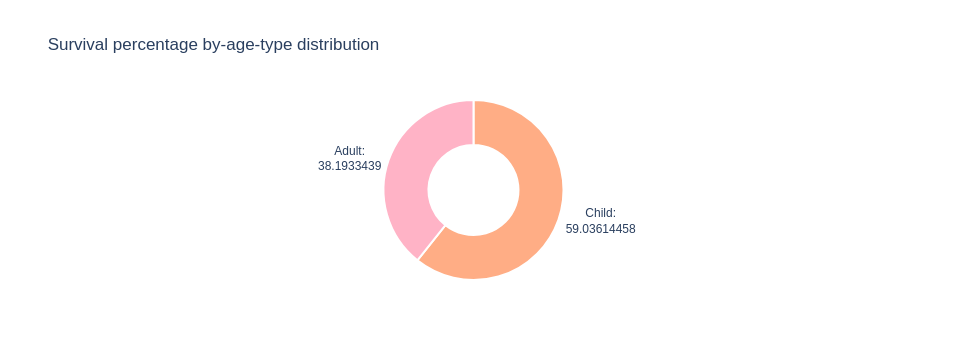

In [146]:
import plotly.graph_objs as go


df = df_all.copy().dropna(subset="Age")
df.loc[:, "age_type"] = df.apply(lambda x: "Child" if x["Age"] < 16 else "Adult", axis=1)

df_grp = df[df["Survived"] == 1].groupby("age_type")["PassengerId"].size().reset_index(name="survived_amount")
df_grp.loc[:, "amount"] = df.groupby("age_type")["PassengerId"].size().reset_index(name="amount")["amount"]
df_grp.loc[:, "survived_percentage"] = df_grp["survived_amount"] / df_grp["amount"] * 100

fig = go.Figure()
fig.add_trace(go.Pie(labels=df_grp["age_type"],
                     values=df_grp["survived_percentage"],
                     textinfo="label+text",
                     texttemplate="%{label}:<br>%{value}",
                     textposition="outside",
                     hoverinfo="label+percent+value",
                     marker = dict(colors = ["#ffb3c6",
                                             "#ffad85"],
                                   line=dict(color="#ffffff", width=2))))
fig.update_layout(title_text="Survival percentage by-age-type distribution",
                  showlegend=False)
fig.update_traces(hole=0.5)

4. Верна ли гипотеза, что женщины и дети сажались в шлюпки первыми и выживали больше?

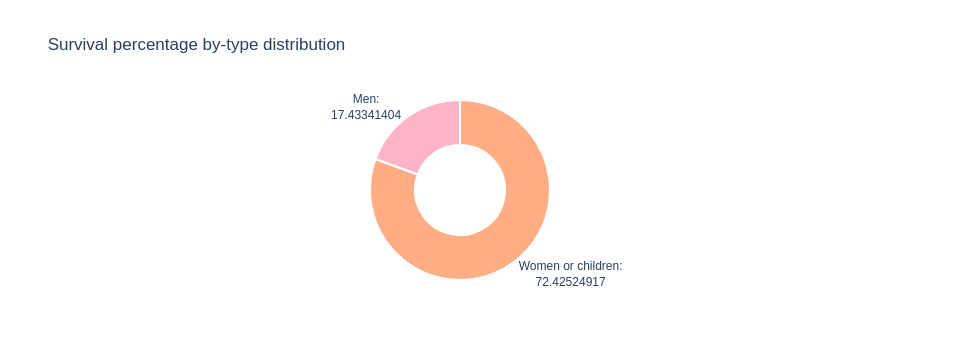

In [145]:
df = df_all.copy().dropna(subset="Age")
df.loc[:, "type"] = df.apply(lambda x: "Men" if (x["Age"] >= 16) & (x["Sex"] == "male") else "Women or children", axis=1)

df_grp = df[df["Survived"] == 1].groupby("type")["PassengerId"].size().reset_index(name="survived_amount")
df_grp.loc[:, "amount"] = df.groupby("type")["PassengerId"].size().reset_index(name="amount")["amount"]
df_grp.loc[:, "survived_percentage"] = df_grp["survived_amount"] / df_grp["amount"] * 100

fig = go.Figure()
fig.add_trace(go.Pie(labels=df_grp["type"],
                     values=df_grp["survived_percentage"],
                     textinfo="label+text",
                     texttemplate="%{label}:<br>%{value}",
                     textposition="outside",
                     hoverinfo="label+percent+value",
                     marker = dict(colors = ["#ffb3c6",
                                             "#ffad85"],
                                   line=dict(color="#ffffff", width=2))))
fig.update_layout(title_text="Survival percentage by-type distribution",
                  showlegend=False)
fig.update_traces(hole=0.5)

# Yes, it's true.  Almost five times more

5. Зависит ли выживаемость от класса обслуживания?

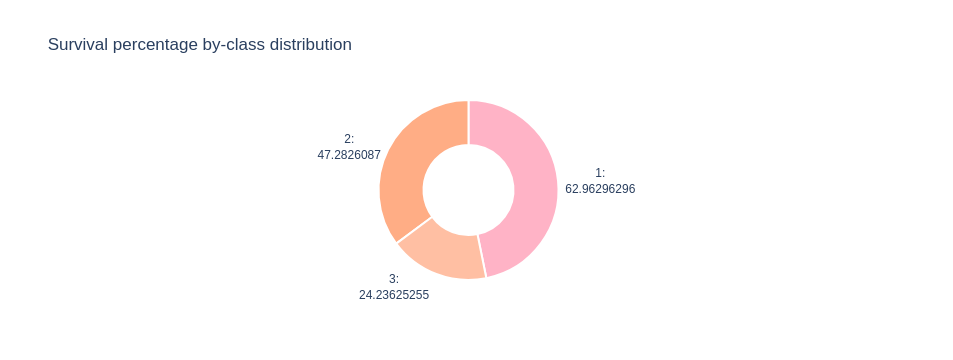

In [144]:
df = df_all.copy()

df_grp = df[df["Survived"] == 1].groupby("Pclass")["PassengerId"].size().reset_index(name="survived_amount")
df_grp.loc[:, "amount"] = df.groupby("Pclass")["PassengerId"].size().reset_index(name="amount")["amount"]
df_grp.loc[:, "survived_percentage"] = df_grp["survived_amount"] / df_grp["amount"] * 100

fig = go.Figure()
fig.add_trace(go.Pie(labels=df_grp["Pclass"],
                     values=df_grp["survived_percentage"],
                     textinfo="label+text",
                     texttemplate="%{label}:<br>%{value}",
                     textposition="outside",
                     hoverinfo="label+percent+value",
                     marker = dict(colors = ["#ffb3c6",
                                             "#ffad85",
                                             "#ffbfa3"],
                                   line=dict(color="#ffffff", width=2))))
fig.update_layout(title_text="Survival percentage by-class distribution",
                  showlegend=False)
fig.update_traces(hole=0.5)

# Yes, first-class passengers were first to be saved, then second-class
#  and after all of them - third-class passengers.

6. Посчитайте средний возраст умерших женщин и мужчин

In [62]:
df_all[df_all["Survived"] == 0].groupby("Sex")["Age"].mean()

Sex
female    25.046875
male      31.618056
Name: Age, dtype: float64

7. Различается ли процент выживаемости пассажиров с хотя бы одним родственником на борту и одиночек?

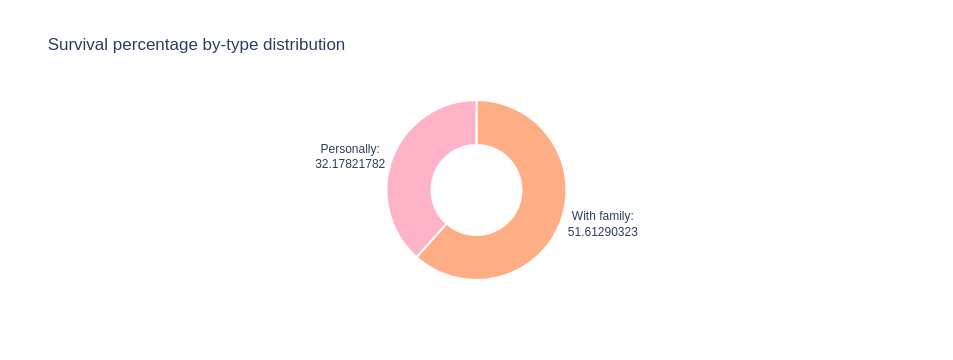

In [143]:
df = df_all.copy().dropna(subset="Age")
df.loc[:, "type"] = df.apply(lambda x: "Personally" if x["SibSp"] + x["Parch"] == 0 else "With family", axis=1)

df_grp = df[df["Survived"] == 1].groupby("type")["PassengerId"].size().reset_index(name="survived_amount")
df_grp.loc[:, "amount"] = df.groupby("type")["PassengerId"].size().reset_index(name="amount")["amount"]
df_grp.loc[:, "survived_percentage"] = df_grp["survived_amount"] / df_grp["amount"] * 100

fig = go.Figure()
fig.add_trace(go.Pie(labels=df_grp["type"],
                     values=df_grp["survived_percentage"],
                     textinfo="label+text",
                     texttemplate="%{label}:<br>%{value}",
                     textposition="outside",
                     hoverinfo="label+percent+value",
                     marker = dict(colors = ["#ffb3c6",
                                             "#ffad85"],
                                   line=dict(color="#ffffff", width=2))))
fig.update_layout(title_text="Survival percentage by-type distribution",
                  showlegend=False)
fig.update_traces(hole=0.5)

# In general, yes, but these signs are almost independent

8. Различается ли средняя стоимость билета у умерших и выживших пассажиров?

In [64]:
df_all.groupby("Survived")["Fare"].median().reset_index()

,Survived,Fare
0,0,10.5
1,1,26.0


9. Выведите максимальный и минимальный возраст выживших пассажиров во 2 классе обслуживания

In [65]:
df = df_all[df_all["Pclass"] == 2].dropna(subset="Age")
print(df["Age"].max())
print(df["Age"].min())

70.0
0.67


10. Подтвердите или опровергните гипотезу: молодым мужчинам(от 18 лет) выжить легче, чем более взрослым

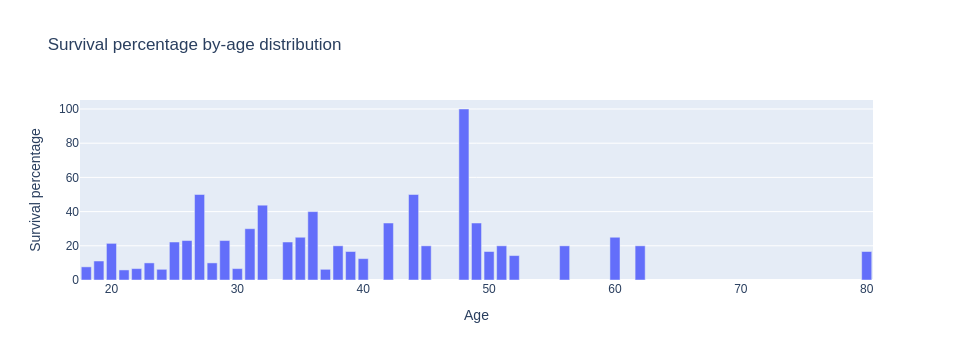

In [75]:
df = df_all[(df_all["Sex"] == "male")
            & (df_all["Age"] >= 18)]
df.loc[:, "Age"] = df["Age"].apply(round)
df_grp = df[df["Survived"] == 1].groupby("Age")["PassengerId"].size().reset_index(name="survived_amount")
df_grp.loc[:, "amount"] = df.groupby("Age")["PassengerId"].size().reset_index(name="amount")["amount"]
df_grp.loc[:, "survived_percentage"] = df_grp["survived_amount"] / df_grp["amount"] * 100

fig = go.Figure()
fig.add_trace(go.Bar(x=df_grp["Age"],
                     y=df_grp["survived_percentage"]))
fig.update_layout(title_text="Survival percentage by-age distribution",
                  xaxis_title="Age",
                  yaxis_title="Survival percentage")

# No, there is not any dependency between these signs

### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

1. Постройте гистограмму распределения возростов пассажиров

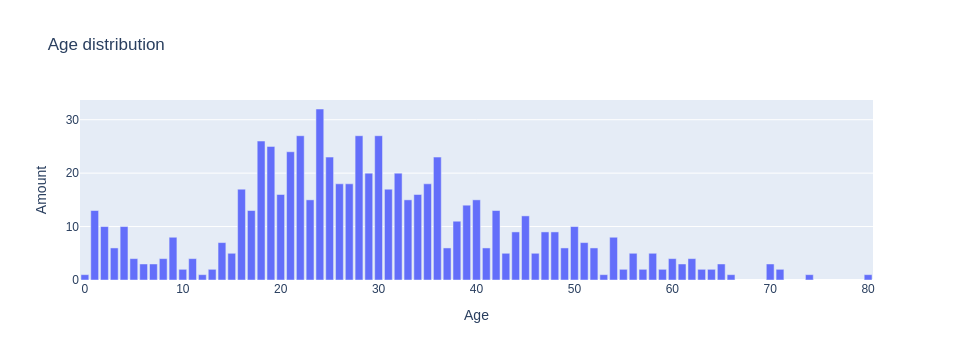

In [81]:
df = df_all.dropna(subset="Age")
df.loc[:, "Age"] = df["Age"].apply(round)
df = df.groupby("Age")["PassengerId"].size().reset_index(name="amount")

fig = go.Figure()
fig.add_trace(go.Bar(x=df["Age"],
                     y=df["amount"]))
fig.update_layout(title_text="Age distribution",
                  xaxis_title="Age",
                  yaxis_title="Amount")

2. Постройте гистограммы распределения цен для пассажиров разных классов

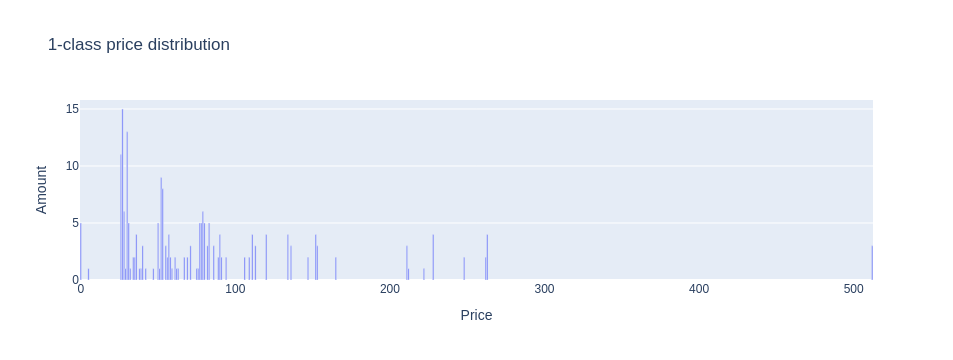

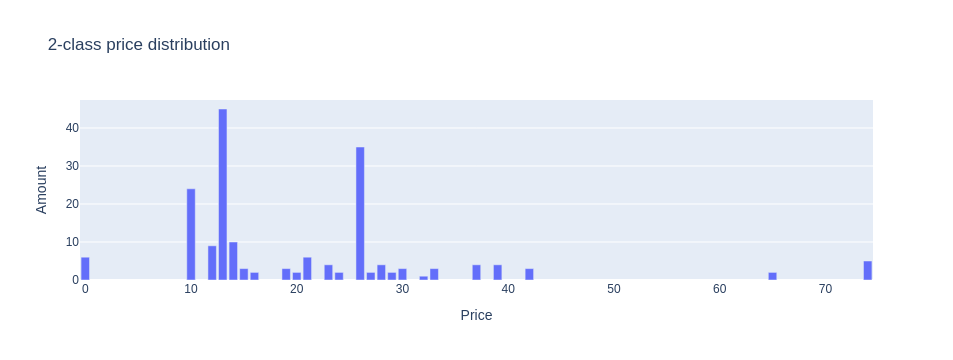

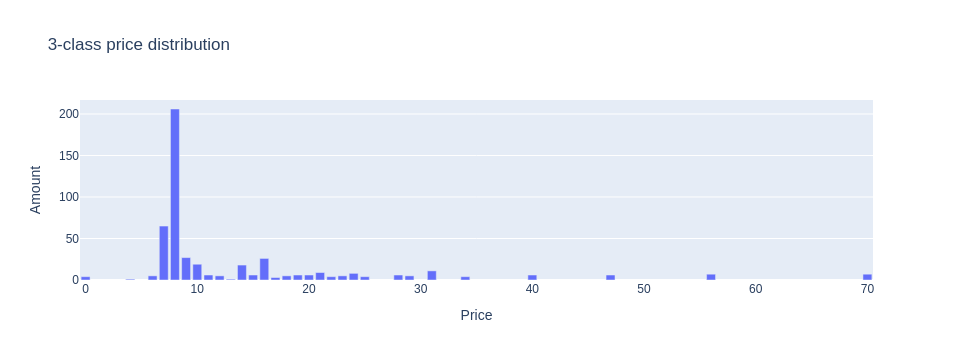

In [127]:
df = df_all.copy()

df = df_all.copy()
df = df.groupby(["Fare", "Pclass"])["PassengerId"].size().reset_index(name="amount")
df.loc[:, "Fare"] = df["Fare"].apply(round)

for p_class in range(1, 4):
    df_class = df[df["Pclass"] == p_class]
    df_class = df_class.groupby("Fare")["amount"].sum().reset_index()
    
    fig = go.Figure()
    fig.add_trace(go.Bar(x=df_class["Fare"],
                         y=df_class["amount"]))
    fig.update_layout(title_text=f"{p_class}-class price distribution",
                      xaxis_title="Price",
                      yaxis_title="Amount")
    fig.show()

3. Постройте зависимость цены от возраста пассажира

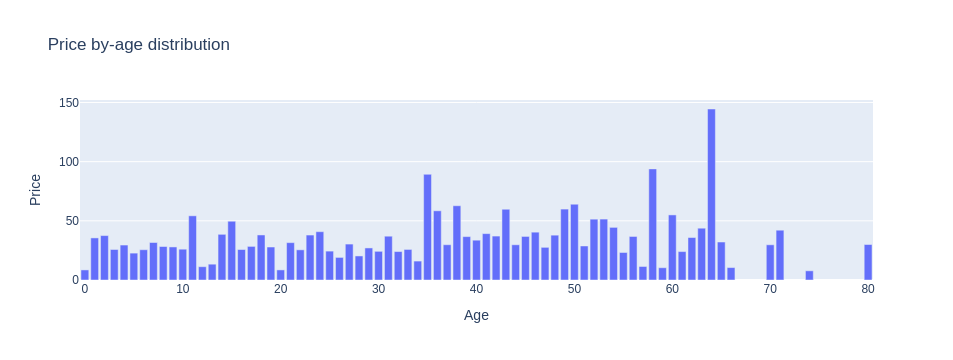

In [130]:
df = df_all.dropna(subset="Age")
df.loc[:, "Age"] = df["Age"].apply(round)
df = df.groupby("Age")["Fare"].mean().reset_index(name="price")

fig = go.Figure()
fig.add_trace(go.Bar(x=df["Age"],
                     y=df["price"]))
fig.update_layout(title_text="Price by-age distribution",
                  xaxis_title="Age",
                  yaxis_title="Price")

4. Постройте box plot отображающий распределение цен на билеты в разных классах

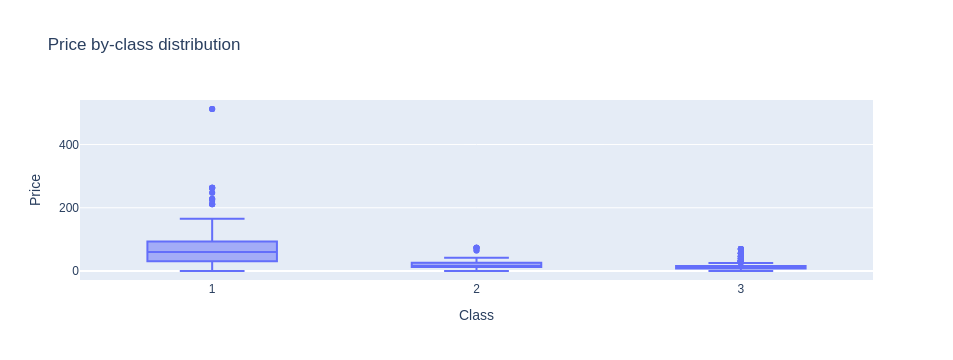

In [135]:
df = df_all.copy()

fig = go.Figure()
fig.add_trace(go.Box(x=df["Pclass"],
                     y=df["Fare"]))
fig.update_layout(title_text="Price by-class distribution",
                  xaxis_title="Class",
                  yaxis_title="Price")

5. Визуализируйте распределение долей выживших среди мужчин, женщин и детей(до 16 лет)

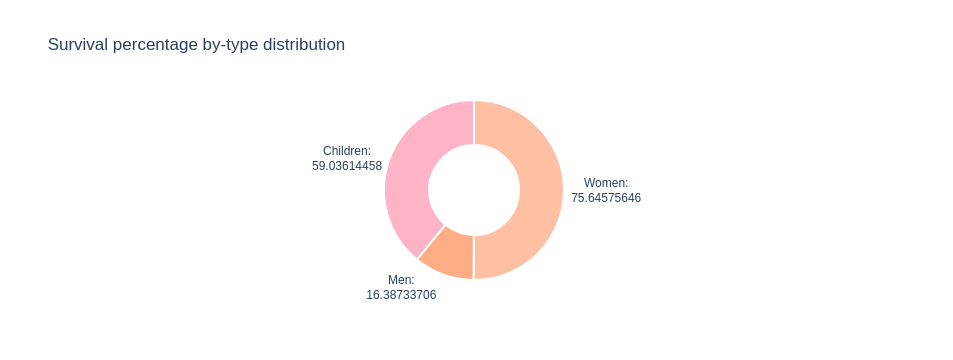

In [142]:
df = df_all.copy()
df.loc[:, "type"] = df.apply(lambda x: "Children" if x["Age"] < 16
                             else "Men" if x["Sex"] == "male"
                             else "Women", axis=1)

df_grp = df[df["Survived"] == 1].groupby("type")["PassengerId"].size().reset_index(name="survived_amount")
df_grp.loc[:, "amount"] = df.groupby("type")["PassengerId"].size().reset_index(name="amount")["amount"]
df_grp.loc[:, "survived_percentage"] = df_grp["survived_amount"] / df_grp["amount"] * 100

fig = go.Figure()
fig.add_trace(go.Pie(labels=df_grp["type"],
                     values=df_grp["survived_percentage"],
                     textinfo="label+text",
                     texttemplate="%{label}:<br>%{value}",
                     textposition="outside",
                     hoverinfo="label+percent+value",
                     marker = dict(colors = ["#ffb3c6",
                                             "#ffad85",
                                             "#ffbfa3"],
                                   line=dict(color="#ffffff", width=2))))
fig.update_layout(title_text="Survival percentage by-type distribution",
                  showlegend=False)
fig.update_traces(hole=0.5)

6. Сравните плотности распределения возростов выживших и умерших пассажиров, сделайте выводы

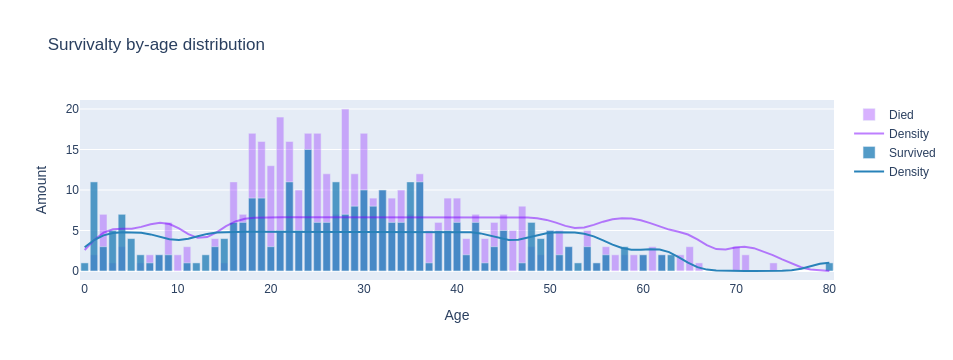

In [187]:
import scipy.stats as sts


df = df_all.copy().dropna(subset="Age")
df.loc[:, "Age"] = df["Age"].apply(round)

fig = go.Figure()
for is_survived in range(2):
    df_cur = df[df["Survived"] == is_survived]
    df_cur = df_cur.groupby("Age")["PassengerId"].size().reset_index(name="amount")
    fig.add_trace(go.Bar(x=df_cur["Age"],
                         y=df_cur["amount"],
                         name="Survived" if is_survived else "Died",
                         marker=dict(color="rgba(40, 130, 185, 0.8)" if is_survived else "rgba(127, 0, 255, 0.3)")))
   
    # Density line
    kde = sts.gaussian_kde(df_cur["Age"], bw_method=0.1)
    age_range = np.linspace(0, 80, 80)
    density = kde(age_range) * df_cur["amount"].sum()
    fig.add_trace(go.Scatter(x=age_range,
                             y=density,
                             mode="lines",
                             name="Density",
                             line=dict(color="rgba(40, 130, 185, 1)" if is_survived else "rgba(127, 0, 255, 0.5)")))
fig.update_layout(title_text="Survivalty by-age distribution",
                  barmode="overlay",
                  xaxis_title="Age",
                  yaxis_title="Amount")

In [ ]:
# The densities showed that there are much more died people than
#  survived ones independent on the age.

7. Постройте круговую диаграмму отображающую выживаемость мужчин и женщин в разных классах обслуживания(визуализация должна быть интуитивно понятная без объяснений, женщины и мужчины соответствующих классов объеденены визуально в одну группу и 2 подгруппы)*

\* Задание на доп. балл